In [62]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import svm
import datetime as dt
from sklearn.ensemble import RandomForestClassifier 

In [63]:
accuracies = []
y_pred_probas = []

df_elo =pd.read_csv("./elorating.csv")
df_elo["date"] = pd.to_datetime(df_elo["date"])
df_elo =  df_elo.set_index("date")

def predict(year):
    df_past_1 = pd.read_csv(f'./match_data_yearly/{year-1}.csv')
    df_past_2 = pd.read_csv(f'./match_data_yearly/{year-2}.csv')
    df_past_3 = pd.read_csv(f'./match_data_yearly/{year-3}.csv')

    df_past = pd.concat([df_past_3,df_past_2,df_past_1]).reset_index(drop=True)    
    df_future = pd.read_csv(f'./match_data_yearly/{year}.csv').reset_index(drop=True) 
    
    df_past.insert(12,'HomeElo',np.nan)
    df_past.insert(13,'AwayElo',np.nan)
    df_past.insert(14,'HomeED',np.nan)
    df_past.insert(15,'AwayED',np.nan)
    
    df_future.insert(12,'HomeElo',np.nan)
    df_future.insert(13,'AwayElo',np.nan)
    df_future.insert(14,'HomeED',np.nan)
    df_future.insert(15,'AwayED',np.nan)
    
    df_past["Date"] =  pd.to_datetime(df_past["Date"])
    df_future["Date"] = pd.to_datetime(df_future["Date"])
    

    for index,row in df_past.iterrows():
        home_elo = df_elo.loc[row["Date"], row["Home"]]
        away_elo = df_elo.loc[row["Date"], row["Away"]]    

        df_past.at[index,"HomeElo"] = home_elo
        df_past.at[index,"AwayElo"] = away_elo

        home_elo_1mago = df_elo.loc[row["Date"]- pd.tseries.offsets.DateOffset(months = 1), row["Home"]]
        away_elo_1mago = df_elo.loc[row["Date"]- pd.tseries.offsets.DateOffset(months = 1), row["Away"]]

        df_past.at[index,"HomeED"] = home_elo - home_elo_1mago
        df_past.at[index,"AwayED"] = away_elo - away_elo_1mago
        
    for index,row in df_future.iterrows():
        home_elo = df_elo.loc[row["Date"], row["Home"]]
        away_elo = df_elo.loc[row["Date"], row["Away"]]    

        df_future.at[index,"HomeElo"] = home_elo
        df_future.at[index,"AwayElo"] = away_elo

        home_elo_1mago = df_elo.loc[row["Date"]- pd.tseries.offsets.DateOffset(months = 1), row["Home"]]
        away_elo_1mago = df_elo.loc[row["Date"]- pd.tseries.offsets.DateOffset(months = 1), row["Away"]]

        df_future.at[index,"HomeED"] = home_elo - home_elo_1mago
        df_future.at[index,"AwayED"] = away_elo - away_elo_1mago

    X_train = df_past[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_train = df_past["W/L"].values
    X_test = df_future[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_test = df_future["W/L"].values

    rf= RandomForestClassifier(max_depth=5)  
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    y_pred_proba=rf.predict_proba(X_test)
    y_pred_probas.append(y_pred_proba) 
    
   
    accuracy = rf.score(X_test,y_test) 
    accuracies.append(accuracy) 

In [64]:
# 8シーズンを10回分予測
for _ in range(10):
    for y in (2013,2014,2015,2016,2017,2018,2019,2020):
        predict(y)

In [65]:
# 8シーズン×10回の精度の平均
np.mean(accuracies)

0.463562091503268

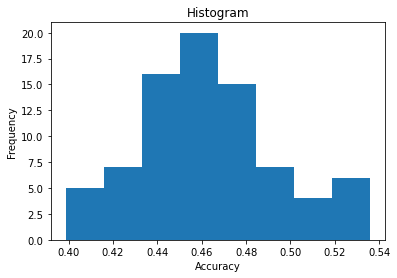

In [6]:
n, bins, patches=plt.hist(accuracies, bins=8)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [71]:
year = 2020

df_past_1 = pd.read_csv(f'./match_data_yearly/{year-1}.csv')
df_past_2 = pd.read_csv(f'./match_data_yearly/{year-2}.csv')
df_past_3 = pd.read_csv(f'./match_data_yearly/{year-3}.csv')

df_past = pd.concat([df_past_3,df_past_2,df_past_1]).reset_index(drop=True)    
df_future = pd.read_csv(f'./match_data_yearly/{year}.csv').reset_index(drop=True) 

In [72]:
df_past.insert(12,'HomeElo',np.nan)
df_past.insert(13,'AwayElo',np.nan)

df_past.insert(14,'HomeED',np.nan)
df_past.insert(15,'AwayED',np.nan)

In [73]:
df_future.insert(12,'HomeElo',np.nan)
df_future.insert(13,'AwayElo',np.nan)

df_future.insert(14,'HomeED',np.nan)
df_future.insert(15,'AwayED',np.nan)

In [74]:
df_past["Date"] =  pd.to_datetime(df_past["Date"])
df_future["Date"] = pd.to_datetime(df_future["Date"])

In [75]:
df_elo =pd.read_csv("./elorating.csv")
df_elo["date"] = pd.to_datetime(df_elo["date"])
df_elo =  df_elo.set_index("date")

In [76]:
for index,row in df_past.iterrows():
    home_elo = df_elo.loc[row["Date"], row["Home"]]
    away_elo = df_elo.loc[row["Date"], row["Away"]]    
    
    df_past.at[index,"HomeElo"] = home_elo
    df_past.at[index,"AwayElo"] = away_elo
    
    home_elo_1mago = df_elo.loc[row["Date"]- pd.tseries.offsets.DateOffset(months = 6), row["Home"]]
    away_elo_1mago = df_elo.loc[row["Date"]- pd.tseries.offsets.DateOffset(months = 6), row["Away"]]
    
    df_past.at[index,"HomeED"] = home_elo - home_elo_1mago
    df_past.at[index,"AwayED"] = away_elo - away_elo_1mago

In [77]:
df_past

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,AwayElo,HomeED,AwayED
0,2017,1,2017-02-25,yokohama-fa-marinos,urawa-red-diamonds,5,3,3,2,1,日産ス,39284,1562.083853,1662.061998,12.974607,17.439890
1,2017,1,2017-02-25,shimizu-s-pulse,vissel-kobe,7,18,0,1,2,アイスタ,17861,1406.460851,1524.134609,0.000000,42.073369
2,2017,1,2017-02-25,kashima-antlers,fc-tokyo,1,22,0,1,2,カシマ,28240,1569.261470,1559.881204,-38.153792,31.781411
3,2017,1,2017-02-25,vegalta-sendai,consadole-sapporo,54,14,1,0,1,ユアスタ,17230,1455.642041,1277.479362,-17.012660,0.000000
4,2017,1,2017-02-25,sanfrecce-hiroshima,albirex-niigata,10,78,1,1,0,Ｅスタ,17545,1587.631135,1414.450313,-15.933328,-27.882057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,2019,34,2019-12-07,yokohama-fa-marinos,fc-tokyo,5,22,3,0,1,日産ス,63854,1581.137621,1557.295148,39.211111,-5.142210
914,2019,34,2019-12-07,vissel-kobe,jubilo-iwata,18,13,4,1,1,ノエスタ,25243,1493.859502,1442.637682,26.428726,-18.002841
915,2019,34,2019-12-07,oita-trinita,cerezo-osaka,31,20,0,2,2,昭和電ド,17233,1432.201390,1553.085215,21.491392,29.344918
916,2019,34,2019-12-07,urawa-red-diamonds,gamba-osaka,3,9,2,3,2,埼玉,47188,1491.737209,1518.958249,-41.751846,21.561337


In [78]:
for index,row in df_future.iterrows():
    home_elo = df_elo.loc[row["Date"], row["Home"]]
    away_elo = df_elo.loc[row["Date"], row["Away"]]    
    
    df_future.at[index,"HomeElo"] = home_elo
    df_future.at[index,"AwayElo"] = away_elo
    
    home_elo_1mago = df_elo.loc[row["Date"]- pd.tseries.offsets.DateOffset(months = 6), row["Home"]]
    away_elo_1mago = df_elo.loc[row["Date"]- pd.tseries.offsets.DateOffset(months = 6), row["Away"]]
    
    df_future.at[index,"HomeED"] = home_elo - home_elo_1mago
    df_future.at[index,"AwayED"] = away_elo - away_elo_1mago

In [79]:
df_future

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,AwayElo,HomeED,AwayED
0,2020,1,2020-02-21,shonan-bellmare,urawa-red-diamonds,12,3,2,3,2,ＢＭＷス,13071,1421.870796,1484.362717,-20.500847,-38.900762
1,2020,1,2020-02-22,vegalta-sendai,nagoya-grampus-eight,54,8,1,1,0,ユアスタ,13968,1458.602016,1430.661356,-5.201577,-36.403446
2,2020,1,2020-02-22,cerezo-osaka,oita-trinita,20,31,1,0,1,ヤンマー,15535,1558.408896,1426.877710,33.330940,4.150293
3,2020,1,2020-02-22,kashiwa-reysol,consadole-sapporo,11,14,4,2,1,三協Ｆ柏,12468,1502.754736,1481.201788,0.000000,-18.717029
4,2020,1,2020-02-22,kawasaki-frontale,sagan-tosu,21,33,0,0,0,等々力,21117,1628.158694,1455.614582,-4.024025,-14.057401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2020,34,2020-12-19,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,11251,1594.223262,1560.240999,-0.357317,-3.276128
302,2020,34,2020-12-19,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,16825,1514.711944,1524.417742,83.408614,-21.304442
303,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,駅スタ,8966,1453.298544,1457.903358,-5.991688,36.133879
304,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,味スタ,14373,1539.610108,1453.139153,-16.034704,-43.642500


In [125]:
X_train = df_past[["HomeElo","AwayElo","HomeED","AwayED"]].values
y_train = df_past["W/L"].values

X_test = df_future[["HomeElo","AwayElo","HomeED","AwayED"]].values
y_test = df_future["W/L"].values

In [126]:
rf= RandomForestClassifier(max_depth=5)  
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_proba=rf.predict_proba(X_test)

In [127]:
rf.score(X_test,y_test) 

0.46078431372549017

In [128]:
rf.feature_importances_

array([0.25296932, 0.29404749, 0.222486  , 0.23049719])

In [120]:
np.sum(y_pred_proba, axis=0)

array([ 71.10084345, 126.83737796, 108.06177859])

In [121]:
print(len(df_future[df_future["W/L"]==0]),len(df_future[df_future["W/L"]==1]),len(df_future[df_future["W/L"]==2]))

68 118 120


### 考察

以前まで外部サイトから取得していたeloratingとは違い今回は自分で算出したところ､精度が大きく下がった｡以前までの所得方法に誤りがあった可能性がある｡
また､今後の拡張性も考慮して自分で算出したratingを用いる｡

rating値しか使っていないので､ratingの大小で分類されやすく分類の精度が伸びていないのでは?と考えられる